# Support Vector Machine

* Support vector machine (SVM) is a binary linear classifier

* There are tricks to make SVM able to solve non-linear problems

* There are extensions which allows using SVM to multiclass classification or regression

* SVM is a supervised learning algorithm

* There are extensions which allows using SVM for (unsupervised) clustering

## Linear SVM

* Lets consider a training dataset of $N$ samples $(\vec x_1, y_1), \cdots, (\vec x_N, y_N)$

* $\vec x_i$ is $D$-dimensional vector representing features

* $y_i$ is a class label, for convenience $y_i = \left\{-1, 1\right\}$

* At this point we assume that classes are linearly separable

* For visualization purpose lets use $D = 2$

In [0]:
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

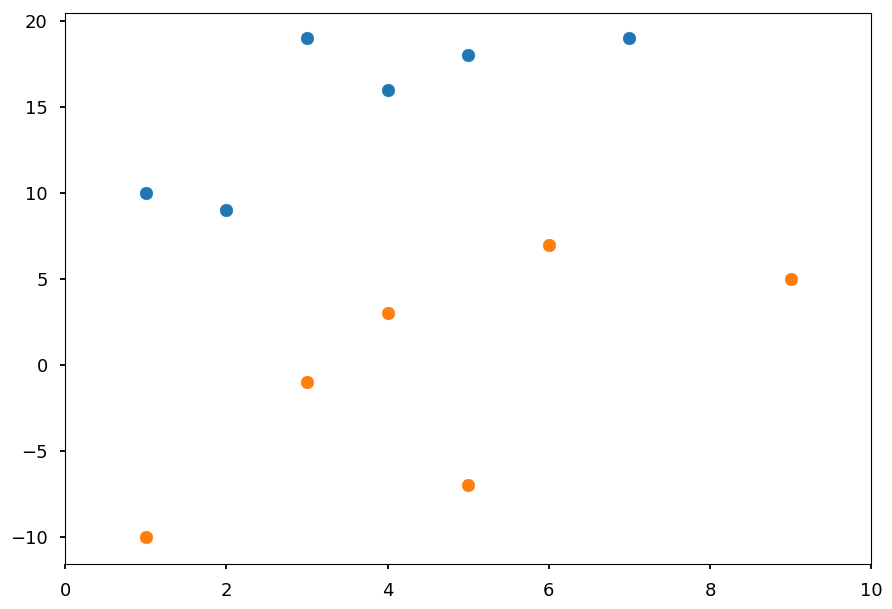

In [29]:
# class I
X01 = [(2, 9), (7, 19), (1, 10), (3, 19), (4, 16), (5, 18)]

# class II
X02 = [(4, 3), (6, 7), (1, -10), (3, -1), (9, 5), (5, -7)]

plt.xlim([0, 10])

plt.scatter(*(zip(*X01)))
plt.scatter(*(zip(*X02)));

* In general we want to find a hyperplane which separates two classes

* In the example above is just a line

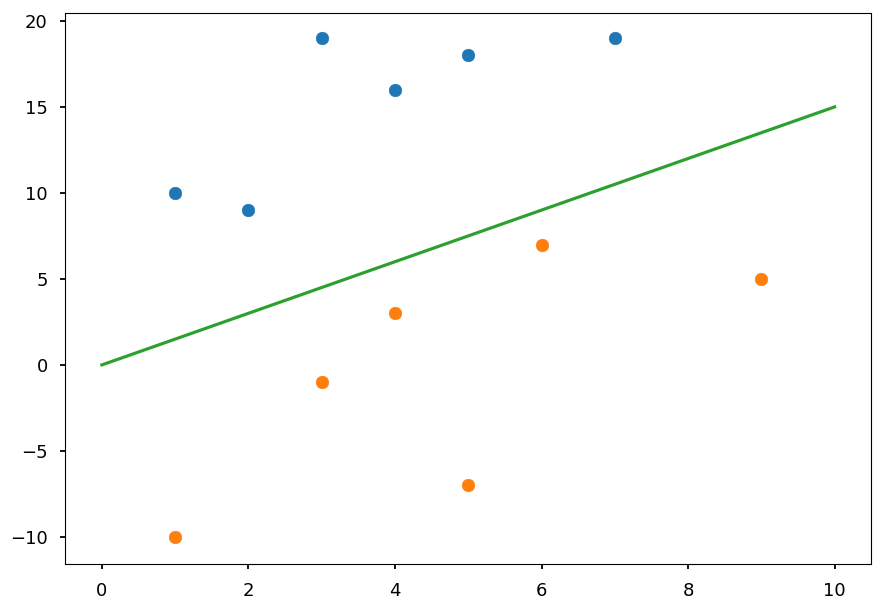

In [543]:
plt.scatter(*(zip(*X01)))
plt.scatter(*(zip(*X02)))

plt.plot([0, 10], [0, 15], 'C2-');

* Once a hyperplane is found, the classification is straightforward

* In this case, everything above a line is classified as a blue point and below as an orange point

* However, there is infinitely many possible lines / hyperplanes

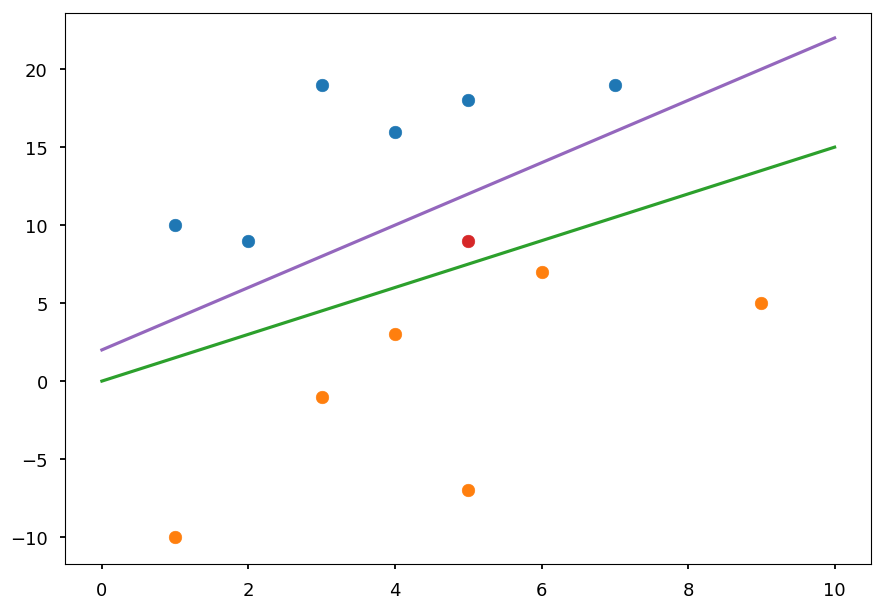

In [550]:
plt.scatter(*(zip(*X01)))
plt.scatter(*(zip(*X02)))

plt.scatter(5, 9, c='C3')  # test point

plt.plot([0, 10], [2, 22], 'C4-');
plt.plot([0, 10], [0, 15], 'C2-');

* On the plot above two possible lines which correctly classify all training data are drawn

* The red point represents a test sample

* Using "by eye" method one could say it is rather orange than blue

* The final predictions depends on the choice of a line though

* Thus, one need a criterion to choose the best line / hyperplane

* SVM chooses the hyperplane which is maximally far away from any training point

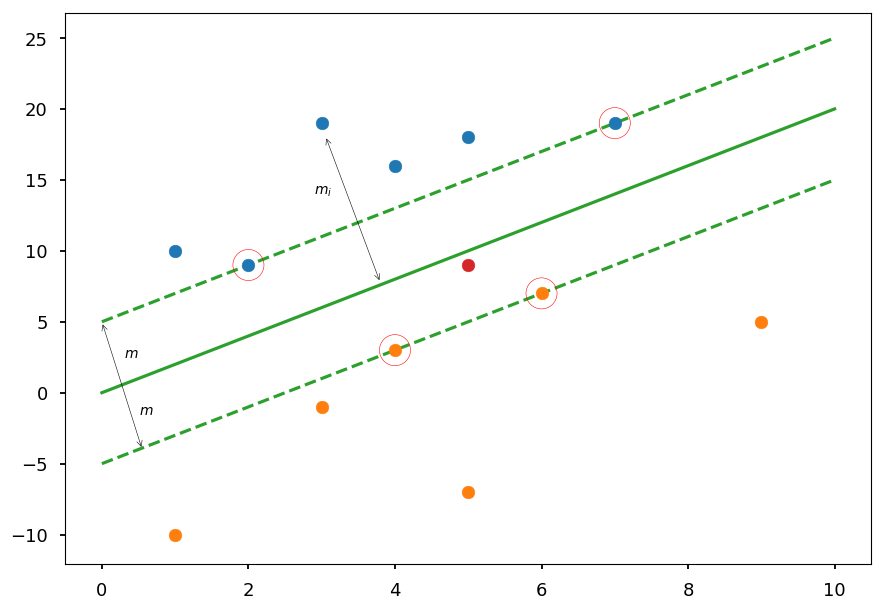

In [650]:
plt.plot([0, 10], [0, 20], 'C2-', zorder=0)
plt.plot([0, 10], [5, 25], 'C2--', zorder=0)
plt.plot([0, 10], [-5, 15], 'C2--', zorder=0)

plt.scatter(5, 9, c='C3')  # test point

plt.annotate('', (0,5), (0.55, -4), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, -1.5, '$m$')
plt.text(0.3, 2.5, '$m$')

plt.annotate('', (3.05,18.1), (3.8, 7.75), arrowprops=dict(arrowstyle='<->'))
plt.text(2.9, 14, '$m_i$')

plt.scatter(*(zip(*X01)), zorder=1)
plt.scatter(*(zip(*X02)), zorder=1)

sv = X01[:2] + X02[:2]

plt.scatter(*(zip(*sv)), zorder=1, facecolors='none', edgecolors='r', s=500);

* The goal is to maximize the **margin** $2m$

* Please note, that the margin is given by the distance of closest data point to the hyperplane

* Which means, that the classifier depends only on a small subset of training data, which are called **support vectors**

### Hard margin

* Any hyperplane can be defined by an intercept term $b$ and a normal vector $\vec w$ (which is usually called **weights** in machine learning)

* All the points $\vec x$ on the hyperplane satisfy $\vec w \cdot \vec x + b = 0$

* If $\vec w \cdot \vec x + b~{> \choose <}~0$ the point is on the $\text{one} \choose \text{other}$ side

* We can easily defined the linear classifier <p align="center"><br>$f(\vec x) = \text{sign}\left(\vec w \cdot \vec x  + b\right)$</p><br>

* That is why we wanted class labels to be $-1$ or $1$ (instead more *standard* $0$ and $1$)

* All we need is to find weights

#### Functional margin

* Lets define functional margin of hyperplane $(\vec w, b)$ w.r.t. a training sample $(\vec x_i, y_i)$ as <p align="center"><br>$\hat m_i = y_i\cdot \left(\vec w \cdot \vec x_i + b\right)$</p><br>

* It is only positive if the training sample label has the same sign as prediction

* The magnitude tells us somewhat about the confidence of a prediction

* But please note, that we can choose arbitrary factor $k$ and $\text{sign}\left(\vec w \cdot \vec x  + b\right) =  \text{sign}\left(k\cdot\vec w \cdot \vec x  + k\cdot b\right)$

* Function margin w.r.t. the whole training dataset is the smallest one <p align="center"><br>$\hat m = \min\limits_{i = 1, \cdots, N}\hat m_i$</p><br>

#### Geometric margin

* Lets $m_i$ be a distance from a training point $\vec x_i$ to a decision boundary / hyperplane $(\vec w, b)$

* Lets $\vec x_h$ be a point on a hyperplane closest to $\vec x_i$

* Shortest distance must be peprendicular to a hyperplane (so parallel to $\vec w$)

* We can express $\vec x_h$ by <p align="center"><br>$\vec x_h = \vec x_i - y_i\cdot m_i\cdot \frac{\vec w}{|\vec w|}$</p><br>

* Because $\vec x_h$ lies on a hyperplane it must fulfill $\vec w \cdot \vec x_h + b = 0$, thus <p align="center"><br>$\vec w\left(\vec x_i - y_i\cdot m_i\cdot \frac{\vec w}{|\vec w|}\right) + b = 0$</p><br>

* Pretty straightforward to solve for $m_i$ <p align="center"><br>$m_i = y_i\frac{\vec w\cdot \vec x_i + b}{|\vec w|} = \frac{\hat m_i}{|\vec w|}$</p><br>

* As before geometric margin w.r.t. the whole training dataset is the smallest one <p align="center"><br>$m = \min\limits_{i = 1, \cdots, N} m_i = \frac{\hat m}{|\vec w|}$</p><br>

* Please note, that $m$ does not change when weights are scaled

* $\hat m = m$ for $|\vec w| = 1$ 

#### The optimal margin

* We want to find the maximum geometric margin $m$

* But with a constraint that for every sample outside the margin <p align="center"><br>$\left.\begin{array}{cc}\text{maximize}_{w, b, m} & m\\\text{subject to} & m_i \geq m\end{array}\right.$</p><br>

* As we discussed, we can choose any normalization of normal vector $|\vec w|$ as it does not change the value of $m_i = y_i\frac{\vec w\cdot \vec x_i + b}{|\vec w|}$

* Lets choose $|\vec w| = \frac{1}{m}$, so <p align="center"><br>$\left.\begin{array}{cc}\text{maximize}_{w, b} & \frac{1}{|\vec w|}\\\text{subject to} & |\vec w|\cdot m_i \geq 1\end{array}\right.$</p><br>

* Since maximizing $|\vec w|^{-1}$ means the same as minimizing $|\vec w|$, we can finally write <p align="center"><br>$\left.\begin{array}{cc}\text{minimize}_{w,b} & \frac{1}{2}|\vec w|^2\\\text{subject to} & \hat m_i \geq 1\end{array}\right.$</p><br>

* Please note that we choose $|\vec w|^2$ over $|\vec w|$ to avoid square root, and $\frac{1}{2}$ is for math convenience

* Now, all we need is to optimize quadratic function over variables subject to linear constraints (quadratic programming)

## Lagrange multipliers

* Lagrange multipliers is the common method used to solve contrained optimization problems

* Lets consider the following problem (with **equality constraint**): <p align="center"><br>$\left.\begin{array}{cc}\text{minimize} & f(\vec x)\\\text{subject to} & g(\vec x) = 0\end{array}\right.$</p><br>

* Please note, that one could also consider $g(\vec x) = c$, where $c$ is constant (then $g'(\vec x) = g(\vec x) - c = 0$)

* Lagrange multiplier theorem says that at constrained optimum (if exists) $\nabla f$ will be parallel to $\nabla g$, so <p align="center"><br>$\nabla f(\vec x) = \lambda\nabla g(\vec x)$</p><br>

* $\lambda$ - a Lagrange multiplier

### How it works

* Lets consider the following problem: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize} & f(x, y) = x^2 + y^2\\\text{subject to} & g(x, y) = x\cdot y - 1 = 0\end{array}\right.$</p><br>


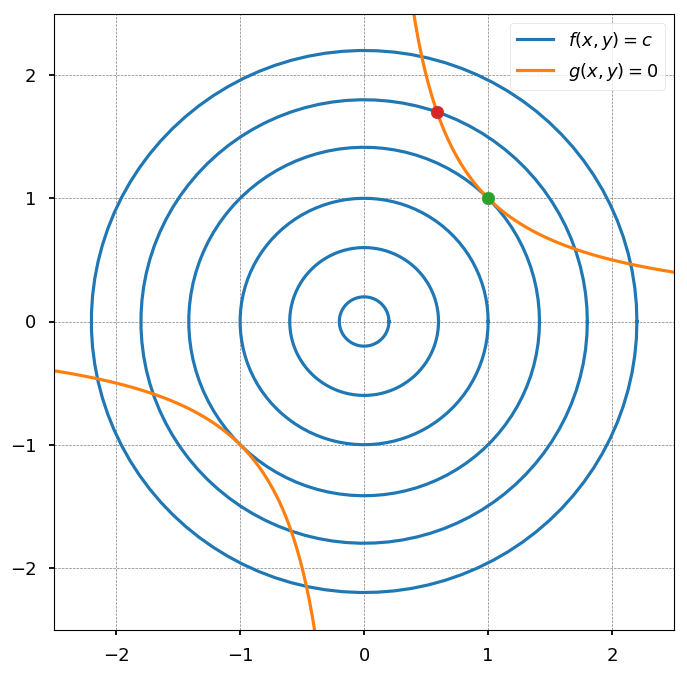

In [59]:
def flc(c, n=100):
  """Level curves of objective functions"""
  return np.array([(c * np.cos(ang), c * np.sin(ang))
                   for ang in np.linspace(0, 2*np.pi, n)])

def g(n=100):
  """Constraint"""
  return np.array([(x, 1./x) for x in np.linspace(0.1, 2.5, n)])

##### PLOT SETTINGS #####

plt.figure(figsize=(8, 8))
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.grid(color='0.5', linestyle='--', linewidth=0.5)

##### LEVEL CURVES OF f(x, y) #####

for c in (0.2, 0.6, 1, 1.8, 2.2):
  plt.plot(*flc(c).T, color='C0')

plt.plot(*flc(np.sqrt(2)).T, color='C0', label='$f(x, y) = c$')
  
##### CONSTRAINTS #####

plt.plot(*g().T, color='C1', label='$g(x, y) = 0$')
plt.plot(*-g().T, color='C1')

##### INTERSECTIONS #####

plt.scatter(1, 1, c='C2', zorder=4)
plt.scatter(np.sqrt(0.345), np.sqrt(1/0.345), c='C3', zorder=4)

plt.legend();

* Blue lines represent the level curves of the objective function ($f(x, y) = const$)

* Orange lines represent the constraints ($g(x, y) = 0$)

* Lets first consider the case that blue and orange curves are not tangent (red point)

    * going along the constraint one direction would result in the decrease of the objective function
    
    * while going in another direction would result in the increase of the objective function
    
    * thus, this point can not be an optimum
    
* The only possibility is that a constrained optimum is where curves are tanget (it still may not be the case, but at least it could be)

### Lagrangian

* In general, there may be many constraints:  <p align="center"><br>$\left.\begin{array}{cc}\text{minimize} & f(\vec x)\\\text{subject to} & g_i(\vec x) = 0, \hspace{5pt} i = 0,\cdots, M\end{array}\right.$</p><br>

* Then, there are $M$ Lagrange multipliers $\lambda_i$

* It is convenient to define Lagrangian: <p align="center"><br>$\mathcal{L}(\vec x, \lambda) = f(\vec x) + \sum\limits_{i=1}^M\lambda_ig_i(\vec x)$</p><br>
  
* and solve: <p align="center"><br>$\nabla_{x_1,\cdots, x_n, \lambda_1,\cdots, \lambda_M} \mathcal{L}(\vec x, \lambda) = 0$</p><br>
  
* which is equivalent to:  <p align="center"><br>$\nabla f(\vec x) = \sum\limits_{i=1}^M\lambda_i\nabla g_i(\vec x)$<br>$g_1(\vec x) = \cdots = g_M(\vec x) = 0$</p><br>

* The optimum (if exists) is always a saddle point of the Lagrangian

    * On the one hand, we want to minimize the Lagrangian over $\vec x$
    
    * And on the other hand, we want to maximize the Lagrangian over $\lambda_i$

#### Example

* Lets consider the objective function $f(x) = x^2$ with a constraint $g(x) = x - 1 = 0$

* The Lagrangian is given by: <p align="center"><br>$\mathcal{L}(x, \lambda) = x^2 + \lambda\cdot (x - 1)$<br>$\frac{\partial\mathcal{L}}{\partial x} = 2x + \lambda = 0$<br>$\frac{\partial\mathcal{L}}{\partial\lambda} = x - 1 = 0$</p><br>

* It has a saddle point at $x = 1$ and $p = -2$

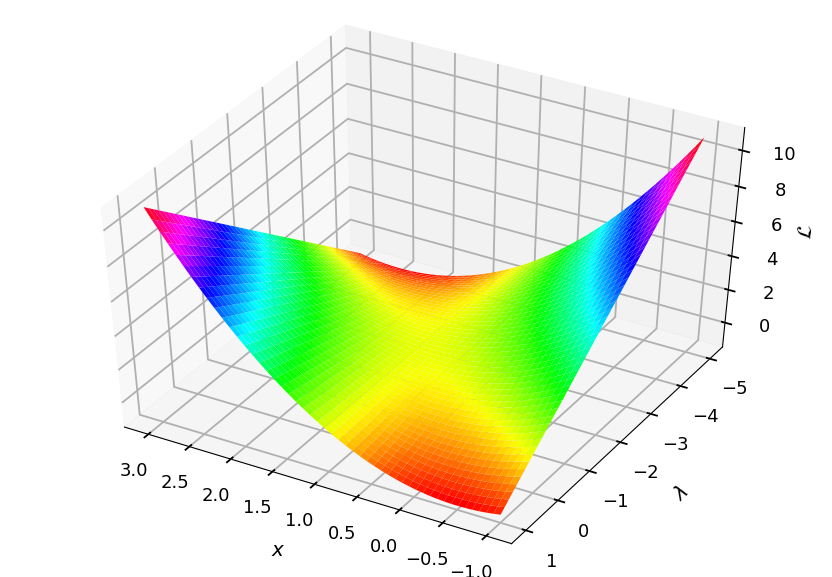

In [145]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

ax = plt.figure().add_subplot(111, projection=Axes3D.name)

X, Y = np.meshgrid(np.linspace(-1, 3, 50), np.linspace(-5, 1, 50))
L = X**2 + Y * (X - 1)

ax.plot_surface(X, Y, L, cmap=cm.hsv)

ax.view_init(elev=45, azim=120)

ax.set_xlabel('$x$', labelpad=20)
ax.set_ylabel('$\lambda$', labelpad=20)
ax.set_zlabel('$\mathcal{L}$', labelpad=10);

### Lagrange duality

* Lets consider the optimization problem with inequality constraints: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize} & f(\vec x)\\\text{subject to} & g_i(\vec x) \leq 0, \hspace{5pt} i = 0,\cdots, M\\\text{} & h_i(\vec x) = 0, \hspace{5pt} i = 0,\cdots, N\end{array}\right.$</p><br>

* We will call it the **primal** optimization problem and define generalized Lagrangian: <p align="center"><br>$\mathcal{L}(\vec x, \mu, \lambda) = f(\vec x) + \sum\limits_{i=1}^M\mu_ig_i(\vec x) + \sum\limits_{i=1}^N\lambda_ih_i(\vec x)$</p><br>

* with the additional restriction that $\mu_i \geq 0$

    * if $i$-th constraint is fulfilled, making $\mu_i$ more positive decrease the Lagrangian
    
    * making $\mu_i$ negative is not allowed
    
* Please note, that in the case of constraints $g_i \geq 0$, the restriction is $\mu_i \leq 0$

* The task can be expressed in terms of minimizing the following function: <p align="center"><br>$\theta_P(\vec x) = \left\{\begin{array}{cc}f(\vec x) & \text{if x satisfies primal constraints} \\ \infty & \text{otherwise}\end{array}\right. = \max\limits_{\mu, \lambda; \mu_i \geq 0}\mathcal{L}(\vec x, \mu, \lambda)$</p><br>

* Thus, we can write the final task in the form: <p align="center"><br>$\min\limits_{\vec x}\theta_P(\vec x) = \min\limits_{\vec x}\max\limits_{\mu, \lambda; \mu_i \geq 0}\mathcal{L}(\vec x, \mu, \lambda)$</p><br>

* Now, lets consider the following "reversed" task: <p align="center"><br>$\max\limits_{\mu, \lambda; \mu_i \geq 0}\min\limits_{\vec x}\mathcal{L}(\vec x, \mu, \lambda) = \max\limits_{\mu, \lambda; \mu_i \geq 0}\theta_D(\mu, \lambda)$</p><br>

* $\theta_D(\mu, \lambda)$ is known as the *dual function* and the maximizing it is called the **dual** problem

* $\theta_D(\mu, \lambda)$ is a concave function (becasue Lagrangian is affine, i.e. linear in multipliers) - maximing $\theta_D$ is a convex optimisation problem

* How it is related to the primal problem: <p align="center"><br>$\mathcal{L}(\vec x, \mu, \lambda) \leq \theta_P(\vec x)$ <br><br> $\min\limits_{\vec x}\mathcal{L}(\vec x, \mu, \lambda) = \theta_D(\mu, \lambda) \leq \min\limits_{\vec x}\theta_P(\vec x)\equiv p^*$ <br><br> $d^* \equiv \max\limits_{\mu, \lambda; \mu_i \geq 0}\theta_D(\mu, \lambda) \leq p^*$</p><br>

* Thus, the optimum of the dual problem $d^*$ is a lower bound for the optimum of the primal problem $p^*$ (known as weak duality)

* The difference $p^* - d^*$ is known as the duality gap

* If the gap is zero ($p^* = d^*$) we have **strong duality**

* If the optimization problem is convex and (strictly) feasible (i.e. there is $\vec x$ which satisfies all constraints) strong duality holds, so there must exist $\vec x^*$, $\mu^*$, $\lambda^*$, so that $\vec x^*$ is the solution of the primal problem and $\mu^*$ and $\lambda^*$ are solutions of the dual problem, and <p align="center"><br>$p^* = d^* = \mathcal{L}(\vec x^*, \mu^*, \lambda^*)$</p><br>

#### KKT conditions

* Moreover, $\vec x^*$, $\mu^*$, $\lambda^*$ satisfy the **Karush-Kuhn-Tucker (KKT)** conditions

* **Stationarity** <p align="center"><br>$\nabla_{\vec x} \mathcal{L}(\vec x^*, \mu^*, \lambda^*) = 0$</p><br>

* **Primal feasibility** <p align="center"><br>$g_i(\vec x^*) \leq 0, \hspace{10pt} h_i(\vec x^*) = 0$</p><br>

* **Dual feasibility** <p align="center"><br>$\mu_i^* \geq 0$</p><br>

* **Complementary slackness (or dual complementarity)** <p align="center"><br>$\mu_i^*\cdot g_i(\vec x^*) = 0$</p><br>

* Why the last one - for strong duality: <p align="center"><br>$f(\vec x^*) = \theta_D(\mu^*, \lambda^*) = \min\limits_{\vec x}\mathcal{L}(\vec x, \mu^*, \lambda^*) \leq f(\vec x^*) + \sum\limits_{i=1}^M\mu_i^*\cdot g_i(\vec x^*) + \sum\limits_{i=1}^N\lambda_i^*\cdot h_i(\vec x ^*) \leq f(\vec x^*)$</p><br>

* The last inequality holds beacause $\sum\limits_{i=1}^M\mu_i^*\cdot g_i(\vec x^*) \leq 0$

* Since $f(\vec x^*)$ must be equal to $f(\vec x^*)$ these inequalities are in fact equalities, so $\sum\limits_{i=1}^M\mu_i^*\cdot g_i(\vec x^*) = 0$

* Because $\mu_i \geq 0$ and $g_i \leq 0$ we get the complementary slackness condition: $\mu_i^*\cdot g_i(\vec x^*) = 0$

* **If $\vec x^*$, $\mu^*$, $\lambda^*$ satisfy KKT conditions, then they are primal and dual solutions**


## Optimal margin

* Lets back to our original optimization problem: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize}_{w,b} & \frac{1}{2}|\vec w|^2\\\text{subject to} & y_i\cdot \left(\vec w \cdot \vec x_i + b\right) \geq 1\end{array}\right.$</p><br>

* Lets rewrite the constraints in the form: $g_i(\vec w) = - y_i\cdot \left(\vec w \cdot \vec x_i + b\right) + 1 \leq 0$

* Please note, that because of the complementary slackness condition, $\mu_i > 0$ only for the training examples ($\vec x_i$) that have functional margin equal to one (**support vectors**)

* Lets write the Langrangian for this problem: <p align="center"><br>$\mathcal{L}(\vec w, b, \mu) = \frac{1}{2}|\vec w|^2 - \sum\limits_{i=1}^M\mu_i\cdot \left[y_i\cdot\left(\vec w \cdot \vec x_i + b\right) - 1\right]$</p><br>

### Dual problem

* To find the dual form of the problem we need to minimize the Lagrangian over $\vec w$ and $b$: <p align="center"><br>$\nabla_{w}\mathcal{L}(\vec w, b, \mu) = \vec w - \sum\limits_{i=1}^M\mu_iy_i\vec x_i = 0 \Rightarrow \vec w = \sum\limits_{i=1}^M\mu_iy_i\vec x_i$</p><br>

* And for the intercept term: <p align="center"><br>$\frac{\partial}{\partial b}\mathcal{L}(\vec w, b, \mu) = \sum\limits_{i=1}^M\mu_iy_i = 0$</p><br>

* It is straightforawrd to show, that using two above equations one can obtain:  <p align="center"><br>$\nabla_{w}\mathcal{L}(\vec w, b, \mu) = \sum\limits_{i=1}^M\mu_i - \frac{1}{2}|\vec w|^2 =  \sum\limits_{i=1}^M\mu_i - \frac{1}{2}\sum\limits_{i,j=1}^My_iy_j\mu_i\mu_j\cdot\left(\vec x_i\cdot \vec x_j\right)$</p><br>

* By examing the dual form the optimization problem is expressed in terms of the **inner product of input feature vectors**:  <p align="center"><br>$\left.\begin{array}{cc}\text{maximize}_{\mu} & \sum\limits_{i=1}^M\mu_i - \frac{1}{2}\sum\limits_{i,j=1}^My_iy_j\mu_i\mu_j\cdot\left<\vec x_i, \vec x_j\right>\\\text{subject to} & \mu_i \geq 0 \\ & \sum\limits_{i=1}^M\mu_iy_i = 0\end{array}\right.$</p><br>

## Non-linear SVM

* SVM can be applied to non-linear problems using the **kernel trick**

* However, before we go there, lets consider a simple non-linear problem

### Example

* Lets consider two classes of 2D points:

    * inside a circle
    
    * outside a circle

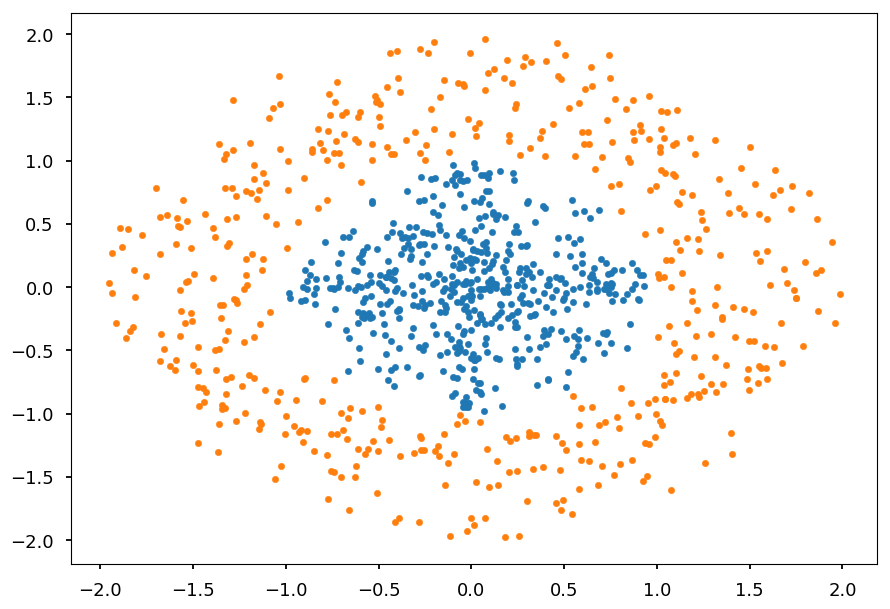

In [10]:
def generate_circle_data(R1=0, R2=1, N=500):
  """Generate N points in a circle for radius range (R1, R2)"""
  r = lambda: R1 + np.random.random() * (R2 - R1)

  return np.array([(r() * np.cos(ang), r() * np.sin(ang))
                   for ang in np.linspace(0, 2*np.pi, N)])

C01 = generate_circle_data()
C02 = generate_circle_data(1, 2)

plt.scatter(*C01.T, marker='.')
plt.scatter(*C02.T, marker='.');

* There is no way to find a line which separates these classes

* But would it be possible to add another dimension and find a plane?

* Lets consider a **feature mapping** $\phi$ which maps *original attributes*: <p align="center"><br>$\phi(x, y) = \left[\begin{array}{c} x \\ y \\ x^2 + y^2\end{array}\right]$</p><br>

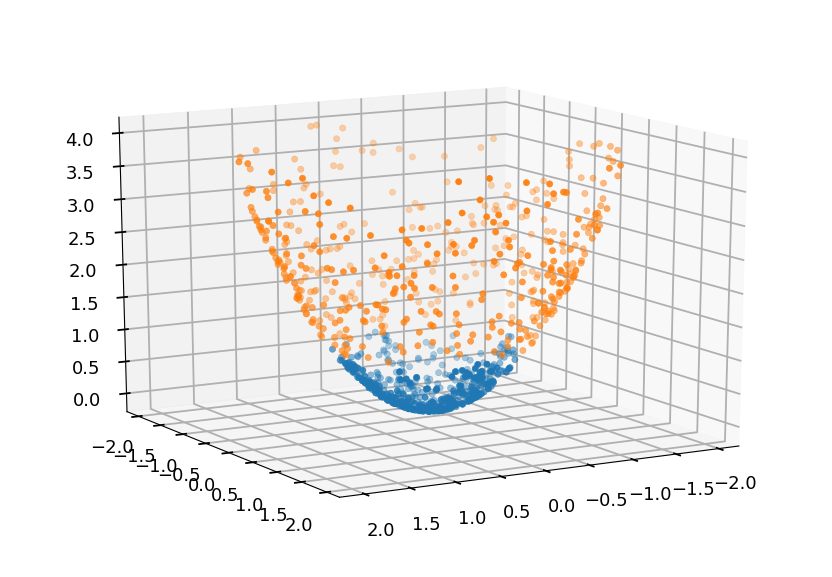

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

ax = plt.figure().add_subplot(111, projection=Axes3D.name)

Z01 = np.array([x**2 + y**2 for x, y in C01])
Z02 = np.array([x**2 + y**2 for x, y in C02])

ax.scatter(*C01.T, Z01, cmap=cm.hsv)
ax.scatter(*C02.T, Z02, cmap=cm.hsv)

ax.view_init(elev=15, azim=60)

* The *new* dataset is a linear problem and can be *easily* solved with SVM

* All we need is to replace (in the dual formulation): $\left<\vec x_i, \vec x_j\right> \rightarrow \left<\phi(\vec x_i), \phi(\vec x_j)\right> = \phi^T(\vec x_i)\phi(\vec x_j)$

### Kernel trick

* Lets define the **kernel** (for given feature mapping $\phi$) as <p align="center"><br>$K(\vec x_i, \vec x_j) = \phi^T(\vec x_i)\phi(\vec x_j)$</p><br>

* Thus, the optimization problem we are trying to solve now is: <p align="center"><br>$\left.\begin{array}{cc}\text{maximize}_{\mu} & \sum\limits_{i=1}^M\mu_i - \frac{1}{2}\sum\limits_{i,j=1}^My_iy_j\mu_i\mu_j\cdot K(\vec x_i, \vec x_j)\\\text{subject to} & \mu_i \geq 0 \\ & \sum\limits_{i=1}^M\mu_iy_i = 0\end{array}\right.$</p><br>

* The trick is now, that we do not have to calculate (or even know) the mapping $\phi$, which could be in general very expensive

* The classifier was deinfed as: <p align="center"><br>$\hat y = \text{sign}\left(\vec w \cdot \vec x  + b\right)$</p><br>

* and its dual form is: <p align="center"><br>$\hat y = \text{sign}\left(\sum\limits_{i=1}^M \mu_iy_i\left<\vec x_i, \vec x\right> + b\right)$</p><br>

* and can be now rewritten in the form: <p align="center"><br>$\hat y = \text{sign}\left(\sum\limits_{i=1}^M \mu_iy_iK(\vec x_i, \vec x) + b\right)$</p><br>

#### Example

* Lets consider the feature mapping $\phi$ (in 3D): <p align="center"><br>$\phi(\vec x) = \left[\begin{array}{c} x_1x_1 \\ x_1x_2 \\ x_1x_3 \\ x_2x_1 \\ x_2x_2 \\ x_2x_3 \\ x_3x_1 \\ x_3x_2 \\ x_3x_3\end{array}\right]$</p><br>

* Calculating $\phi(\vec x)$, where $\vec x \in \mathcal{R}^N$, requires $O(n^2)$ time

* The related kernel is given by: <p align="center"><br>$K(\vec x_i, \vec x_j) = \left<x_i, \vec x_j\right>^2$</p><br>

* requires only $O(n)$ time

### Mercer theorem

* Having some function $K$, how can we tell if it is a valid kernel?

* For a valid kernel, there must exist a feature mapping $\phi$, so that $K(\vec x_i, \vec x_j) = \phi^T(\vec x_i)\phi(\vec x_j)$

* Lets define the **kernel matrix** $K_{ij} = K(\vec x_i, \vec x_j)$

* If $K$ is a valid kernel the corresponding matrix must be symmetric: $K_{ij} = \phi^T(\vec x_i)\phi(\vec x_j) = \phi^T(\vec x_j)\phi(\vec x_i) = K_{ji}$

* Moreover, $K$ must be positive semi-definite ($K \geq 0$): <p align="center"><br>$z^TKz = \sum\limits_i\sum\limits_jz_iK_{ij}z_j = \sum\limits_i\sum\limits_jz_i\phi^T(\vec x_i)\phi(\vec x_j)z_j = \sum\limits_i\sum\limits_j\sum\limits_kz_i\phi_k(\vec x_i)\phi_k(\vec x_j)z_j = \sum\limits_k\left(\sum\limits_iz_i\phi_k(\vec x_i)\right)^2 \geq 0$</p><br>

* **Mercer theorem**

<p><br>Let $K: \mathcal{R}^n\times \mathcal{R}^N \rightarrow \mathcal{R}$ be given. Then, for $K$ to be a valid kernel, it is necessary and **sufficient** that for any $\left\{x_1, \cdots x_m\right\}$, the corresponding kernel matrix is symmetric positive semi-definite.</p><br>

### Kernel examples

* **Gaussian kernel** <p align="center"><br>$K(\vec x, \vec y) = \exp\left(-\frac{||\vec x - \vec y||}{2\sigma^2}\right)$</p><br>

* **Polynomial kernel** <p align="center"><br>$K(\vec x, \vec y) = \left(\vec x \cdot \vec y + c\right)^d$</p><br>

* **Sigmoid kernel** <p align="center"><br>$K(\vec x, \vec y) = \tanh\left(a\vec x \cdot \vec y + c\right)$</p><br>

## Soft margin

* So far, everything was considered with the assumption that data is (linearly) separable

* Mapping to a high-dimensional feature space may make data separable, but it can not guarantee that

* Also, due to some noise in data, some outliers may lead to overfitting

* Lets consider the example below

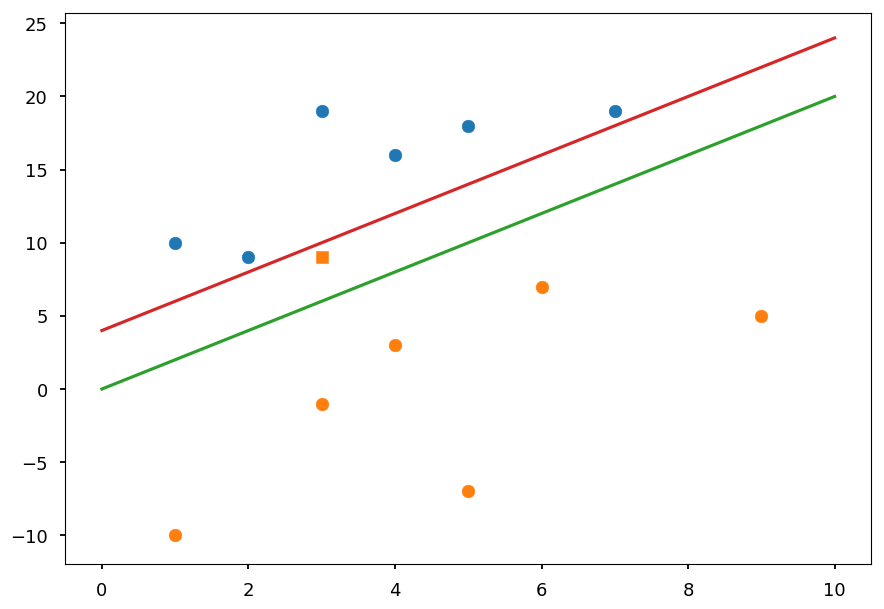

In [31]:
plt.plot([0, 10], [0, 20], 'C2-', zorder=0)
plt.plot([0, 10], [4, 24], 'C3-', zorder=0)

plt.scatter(3, 9, c='C1', marker=',')

plt.scatter(*(zip(*X01)), zorder=1)
plt.scatter(*(zip(*X02)), zorder=1);

* The green line represents the optimal decision boundary if the orange square point is not included

* The red line represents the case when the outlier is considered

* Including the extra point drastically changes the result

* The idea behind the **soft margin** is to allow some points to lie of the *wrong* side of a decision boundary  

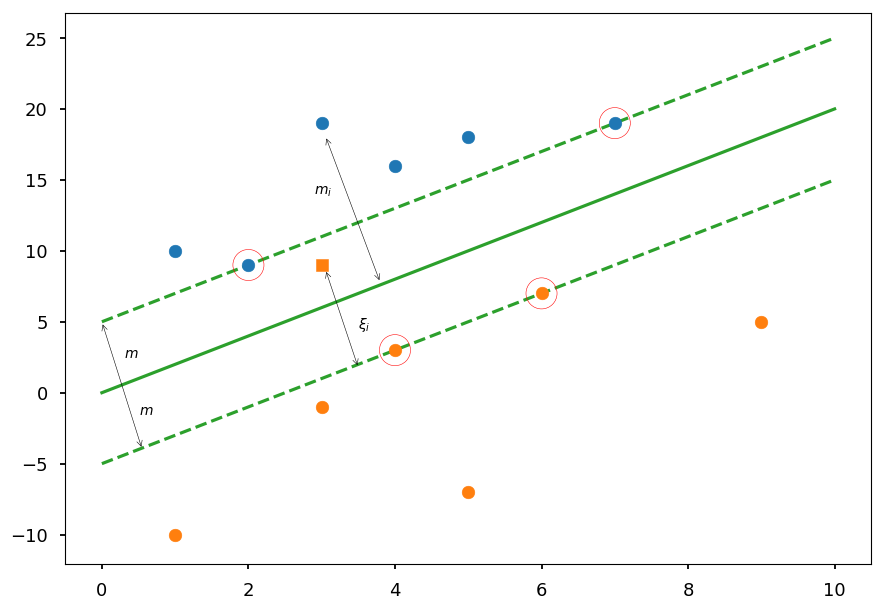

In [62]:
plt.plot([0, 10], [0, 20], 'C2-', zorder=0)
plt.plot([0, 10], [5, 25], 'C2--', zorder=0)
plt.plot([0, 10], [-5, 15], 'C2--', zorder=0)

plt.scatter(3, 9, c='C1', marker=',')
plt.annotate('', (3.05,8.7), (3.5, 1.75), arrowprops=dict(arrowstyle='<->'))
plt.text(3.5, 4.5, '$\\xi_i$')

plt.annotate('', (0,5), (0.55, -4), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, -1.5, '$m$')
plt.text(0.3, 2.5, '$m$')

plt.annotate('', (3.05,18.1), (3.8, 7.75), arrowprops=dict(arrowstyle='<->'))
plt.text(2.9, 14, '$m_i$')

plt.scatter(*(zip(*X01)), zorder=1)
plt.scatter(*(zip(*X02)), zorder=1)

sv = X01[:2] + X02[:2]

plt.scatter(*(zip(*sv)), zorder=1, facecolors='none', edgecolors='r', s=500);

### Regularization

* Regularization is a common technique to prevent overfitting (more about that next week)

* Lets reformulate the original optimization problem: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize}_{w,b} & \frac{1}{2}|\vec w|^2 + C\sum
\limits_i\xi_i\\\text{subject to} & \hat y_i\cdot\left(\vec w \cdot \vec x + b\right) \geq 1 - \xi_i \\ & \xi_i \geq 0\end{array}\right.$</p><br>

* We now allow to have a functional margin less than 1, but if a training point has functional margin $1 - \xi_i$ we would pay a cost of the objective function being increased by $C\xi_i$

* Thus, $C$ controls how much we penalize "bad" points (with $C = \infty$ we are back to the original perfectly separate case)

* Lets write the Lagrangian for this optimization problem: <p align="center"><br>$\mathcal{L}(\vec w, b, \xi, \mu, r) = \frac{1}{2}|\vec w|^2 + C\sum
\limits_{i=1}^M \xi_i - \sum\limits_{i=1}^M\mu_i\cdot \left[y_i\cdot\left(\vec w \cdot \vec x_i + b\right) - 1 + \xi_i\right] - \sum\limits_{i=1}^Mr_i\xi_i$</p><br>

* After the same procedure as before we get similar dual problem: <p align="center"><br>$\left.\begin{array}{cc}\text{maximize}_{\mu} & \sum\limits_{i=1}^M\mu_i - \frac{1}{2}\sum\limits_{i,j=1}^My_iy_j\mu_i\mu_j\cdot\left<\vec x_i, \vec x_j\right>\\\text{subject to} & C \geq \mu_i \geq 0 \\ & \sum\limits_{i=1}^M\mu_iy_i = 0\end{array}\right.$</p><br>

* The only difference is the extra constraint on $\mu_i$, which comes from $\frac{\partial\mathcal{L}}{\partial\xi_i} = C - \mu_i - r_i = 0$

* Lets consider also complementary slackness conditions: <p align="center"><br>$\mu_i\cdot\left[y_i\cdot\left(\vec w \cdot \vec x_i + b\right) - 1 + \xi_i\right] = 0$ <br> $r_i\xi_i = 0$</p><br>

* In the case $\mu_i = 0$, $r_i = C > 0 \Rightarrow \xi_i = 0$: <p align="center"><br>$y_i\cdot\left(\vec w \cdot \vec x + b\right) \geq 1$</p><br>

* In the case $\mu_i = C$, $r_i = 0 \Rightarrow \xi_i \geq 0$: <p align="center"><br>$y_i\cdot\left(\vec w \cdot \vec x + b\right) \leq 1$</p><br>

* In the case $0 < \mu_i < C$, $r_i = C - \mu_i > 0 \Rightarrow \xi_i = 0$: <p align="center"><br>$y_i\cdot\left(\vec w \cdot \vec x + b\right) = 1$</p><br>

## SMO algorithm

* We need to solve:  <p align="center"><br>$\left.\begin{array}{cc}\text{maximize}_{\mu} & \sum\limits_{i=1}^M\mu_i - \frac{1}{2}\sum\limits_{i,j=1}^My_iy_j\mu_i\mu_jk_{ij} \equiv \mathcal{L}_D(\mu)\\\text{subject to} & C \geq \mu_i \geq 0 \\ & \sum\limits_{i=1}^M\mu_iy_i = 0\end{array}\right.$</p><br>

* where (for convenience) $k_{ij} = K(\vec x_i, \vec x_j)$

* Sequential minimal optimization (SMO) algorithm solves the smallest possible optimization problem at a time

* By updating two Lagrange multipliers $\mu_i$ in a step

* One can not update only one because of the constraint $\sum\limits_i\mu_iy_i = 0$

### Quick math

* Without loss of generality, lets consider optimizing $\mu_1$ and $\mu_2$ from an old set of feasible solution: $\mu_1^{old}, \mu_2^{old}, \mu_3 \cdots \mu_M$

* Because of the constraint, $y_1\mu_1 + y_2\mu_2 = y_1\mu_1^{old} + y_2\mu_2^{old}$

* Which can be rewritten as: <p align="center"><br>$\mu_1 = \gamma - s\mu_2$</p><br>

* where $s = y_1y_2$ and $\gamma = \mu_1 + s\mu_2 = \mu_1^{old} + s\mu_2^{old}$

* Thus, the optimization is on a line as shown below (two possibilities based on the sign of $s$):

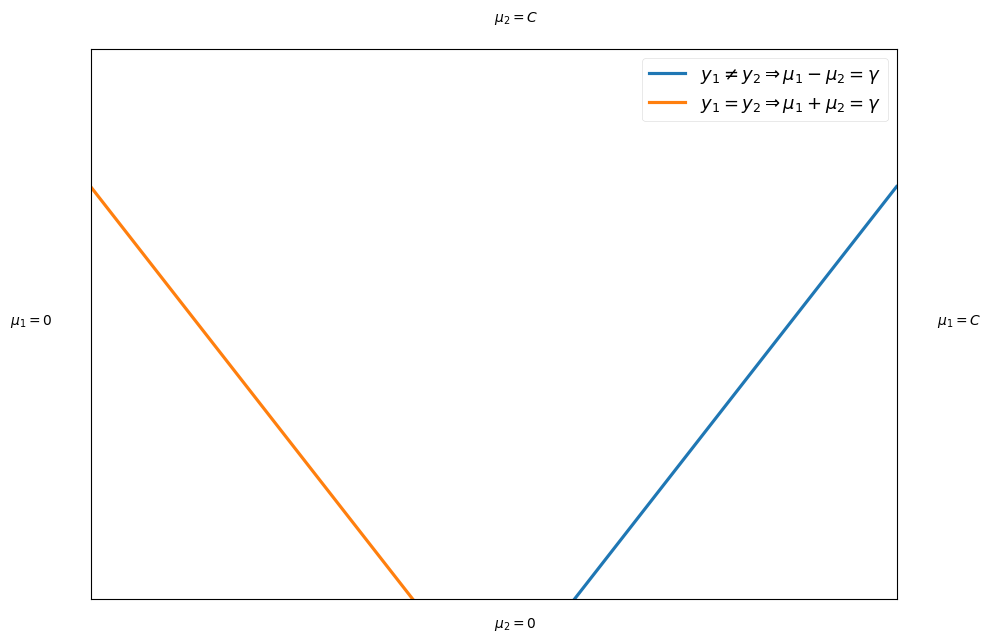

In [31]:
plt.xticks([], [])
plt.yticks([], [])
plt.xlim([0,1])
plt.ylim([0,1])

plt.text(1.05, 0.5, "$\mu_1 = C$")
plt.text(-0.1, 0.5, "$\mu_1 = 0$")
plt.text(0.5, 1.05, "$\mu_2 = C$")
plt.text(0.5, -0.05, "$\mu_2 = 0$")

plt.plot((0.6,1), (0,0.75), label="$y_1 \\neq y_2 \Rightarrow \mu_1 - \mu_2 = \gamma$")
plt.plot((0.4,0), (0,0.75),  label="$y_1 = y_2 \Rightarrow \mu_1 + \mu_2 = \gamma$")

plt.legend();


* First lets fixed all $\mu_i$ for $i \neq 1,2$ and write the objective funtion in the following term:

<p align="center">$\begin{eqnarray}
\mathcal{L}_D & = & \mu_1 + \mu_2 + const \\
              & - & \frac{1}{2}\left(k_{11}\mu_1^2 + k_{22}\mu_2^2 + 2sk_{12}\mu_1\mu_2\right) \\
              & - & y_1\mu_1\sum\limits_{i=3}^My_i\mu_ik_{1i} - y_2\mu_2\sum\limits_{i=3}^My_2\mu_2k_{2i} \\
              & + & const
\end{eqnarray}$</p>

* Where $const$ does not depend on either $\mu_1$ nor $\mu_2$

* Please note, that when formulating the dual problem we got: <p align="center"><br>$\nabla_{w}\mathcal{L}(\vec w, b, \mu) = \vec w - \sum\limits_{i=1}^M\mu_iy_i\vec x_i = 0 \Rightarrow \vec w = \sum\limits_{i=1}^M\mu_iy_i\vec x_i$</p><br>

* For convenience, lets introduce:

<p align="center"><br>$\begin{eqnarray}
v _j & = & \sum\limits_{i=3}y_i\mu_ik_{ij} \\
     & = & \sum\limits_{i=1}y_i\mu_i^{old}k_{ij} + b^{old} - y_1\mu_1^{old}k_{1j} - y_2\mu_2^{old}k_{2j} - b^{old} \\
     & = & z_j^{old} - b^{old} -  y_1\mu_1^{old}k_{1j} - y_2\mu_2^{old}k_{2j}
\end{eqnarray}$</p><br>

* where $z_j^{old} = \vec x_j \cdot \vec w + b^{old}$ is the output of $\vec x_j$ under old parameters.

* Lets get back to the objective function:

<p align="center">$\begin{eqnarray}
\mathcal{L}_D & = & \mu_1 + \mu_2 + const \\
              & - & \frac{1}{2}\left(k_{11}\mu_1^2 + k_{22}\mu_2^2 + 2sk_{12}\mu_1\mu_2\right) \\
              & - & y_1\mu_1v_1 - y_2\mu_2v_2 + const
\end{eqnarray}$</p>

* We can remove $\mu_1$ from the equation using $\mu_1 = \gamma - s \mu_2$

* After long (but relatively straightforward) algebra we get: <p align="center"><br>$\mathcal{L}_D = \frac{1}{2}\eta\mu_2^2 + \left[y_2\cdot\left(E_1^{old} - E_2^{old}\right) - \eta\mu_2^{old}\right]\mu_2 + const$</p><br>

* where

<p align="center">$\begin{eqnarray}
\eta & = & 2k_{12} - k_{11} - k_{22} \\
E_i^{old} & = & z_i^{old} - y_i
\end{eqnarray}$</p>

* To get a maximum we need first derivative to be zero and the second one to be negative

<p align="center">$\begin{eqnarray}
\frac{d\mathcal{L}_D}{d\mu_2} & = & \eta\mu_2 + \left[y_2\cdot\left(E_1^{old} - E_2^{old}\right) - \eta\mu_2^{old}\right] = 0 \\
\frac{d^2\mathcal{L}_D}{d\mu_2^2} & = & \eta
\end{eqnarray}$</p>

* Please note, that $\eta \leq 0$ from the definition, but one must be careful when $\eta = 0$

* If $\eta < 0$ we get the **unconstrained** maximum point: <p align="center"><br>$\mu_2^{new} = \mu_2^{old} + \frac{y_2\left(E_2^{old} - E_1^{old}\right)}{\eta}$</p><br>

* However, because of the constraint $0 \leq \mu_i \leq C$, we have to clip $\mu_2^{new}$

* The minimum and maximum values depends on $s$ (see the plot above)

* If $s = 1$, then $\mu_1 + \mu_2 = \gamma$:

    * If $\gamma > C$, then $\max\mu_2 = C$ and $\min\mu_2 = \gamma - C$
    
    * If $\gamma < C$, then $\max\mu_2 = \gamma$ and $\min\mu_2 = 0$
    
* If $s = -1$, then $\mu_1 - \mu_2 = \gamma$:

    * If $\gamma > C$, then $\max\mu_2 = C - \gamma$ and $\min\mu_2 = 0$
    
    * If $\gamma < C$, then $\max\mu_2 = C$ and $\min\mu_2 = -\gamma$
    
* Let the minimum feasible value of $\mu_2$ be $L$, and maximum be $H$: <p align="center"><br>$\mu_2^{new} \rightarrow \left\{\begin{array}{ll}H, & \mu_2^{new} > H \\ \mu_2^{new}, & L \leq \mu_2^{new} \leq H \\ L & \mu_2^{new} < L\end{array}\right.$</p><br> 


### Math summary

* Given $\mu_1$, $\mu_2$ and the corresponding $y_1$, $y_2$, $k_{11}$, $k_{12}$, $k_{22}$, $\Delta E = E_2^{old} - E_1^{old}$

* Calculate $\eta = 2k_{12} - k_{11} - k_{22}$

* If $\eta > 0$: calculate $\Delta\alpha_2 = y_2\Delta E / \eta$, clip the solution to the feasible region, and calculate $\Delta\mu_1 = -s\Delta\mu_2$

* If $\eta = 0$: evaluate the objective function at the two endpoints and choose $\mu_2$ which correponds to the larger value of the objective function

### Updating after a successful optimization step

* Lets define the predition error on $(\vec x, y)$: <p align="center"><br>$E(\vec x, y) = \sum\limits_{i=1}^My_i\mu_iK(\vec x_i, \vec x) + b - y$</p><br>

* The change in error after an update: <p align="center"><br>$\Delta E(\vec x, y) = E^{new}(\vec x, y) - E^{old}(\vec x, y) =  y_1\Delta\mu_1 K(\vec x_1, \vec x) + y_2\Delta\mu_2 K(\vec x_2, \vec x) + \Delta b$</p><br>

* If $\mu_1$ is not at the bounds it forces $E^{new}(\vec x_1, y_1) \equiv E_1 = 0$, thus <p align="center"><br>$\Delta b_1 = -E_1 - y_1\Delta\mu_1 K(\vec x_1, \vec x_1) - y_2\Delta\mu_2 K(\vec x_2, \vec x_1)$</p><br>

* Alternatively, if $\mu_2$ is not at the bounds it forces $E^{new}(\vec x_2, y_2) \equiv E_2 = 0$, thus <p align="center"><br>$\Delta b_2 = -E_2 - y_1\Delta\mu_1 K(\vec x_1, \vec x_2) - y_2\Delta\mu_2 K(\vec x_2, \vec x_2)$</p><br>

* If both $\mu_1$ and $\mu_2$ take $0$ or $C$, SMO algorithm calculates new $b$ for both and takes average (any $b$ between new $b_1$ and $b_2$ satisfies KKT conditions)

* Updating weights is straightforward: $\Delta \vec w = y_1\Delta\mu_1\vec x_1 + y_2\Delta\mu_2\vec x_2$

### Choosing $\mu$ to optimize

* The outer loop selects the first $\mu_i$ and the inner loop selects the second one $\mu_j$ that minimized $|E_j - E_i|$

* The outer loop first goes through all examples selecting the ones violating KKT conditions

* Then it iterates over all examples whose Lagrange multipliers are neither $0$ nor $C$ (the non-bound examples)

* It repeats passes through the non-bound examples until all satisify KKT condition within some error $\epsilon$

* The it goes back and loop over all training set

* SMO repeats the procedure until all examples satisfy KKT conditions within $\epsilon$

* To avoid bullying CPU SMO keeps a cashed error value for every non-bound example

## Examples

### Initial problem

* Lets first consider the simple example given at the beginning of the lecture

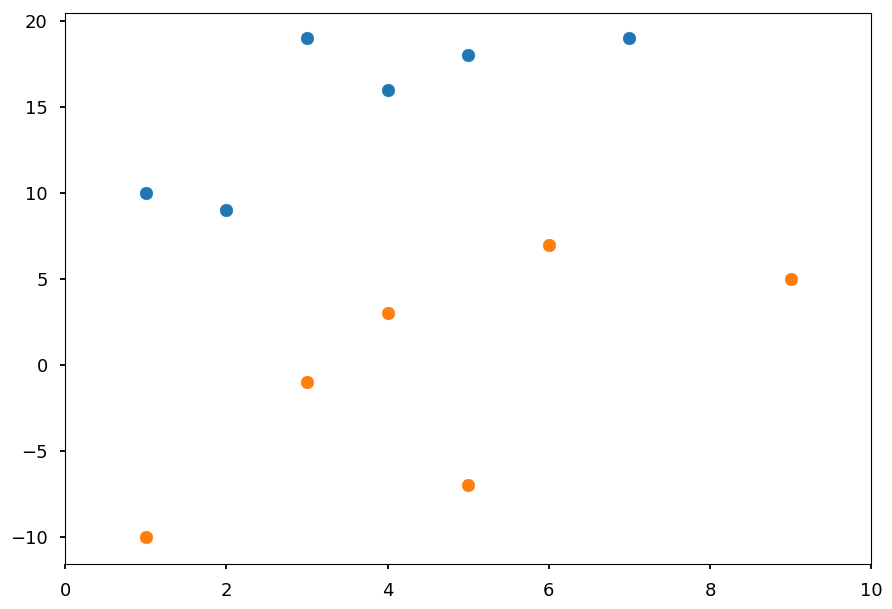

In [3]:
# class I
X01 = [(2, 9), (7, 19), (1, 10), (3, 19), (4, 16), (5, 18)]

# class II
X02 = [(4, 3), (6, 7), (1, -10), (3, -1), (9, 5), (5, -7)]

plt.xlim([0, 10])

plt.scatter(*(zip(*X01)))
plt.scatter(*(zip(*X02)));

* As we know it is linear problem we will use the linear kernel

In [4]:
from sklearn import svm

# create a classifier
clf = svm.SVC(kernel="linear")

# train classifier - assign -1 label for X01 and 1 for X02
clf.fit(X01 + X02, [-1]*len(X01) + [1]*len(X02))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* Lets visualize the result

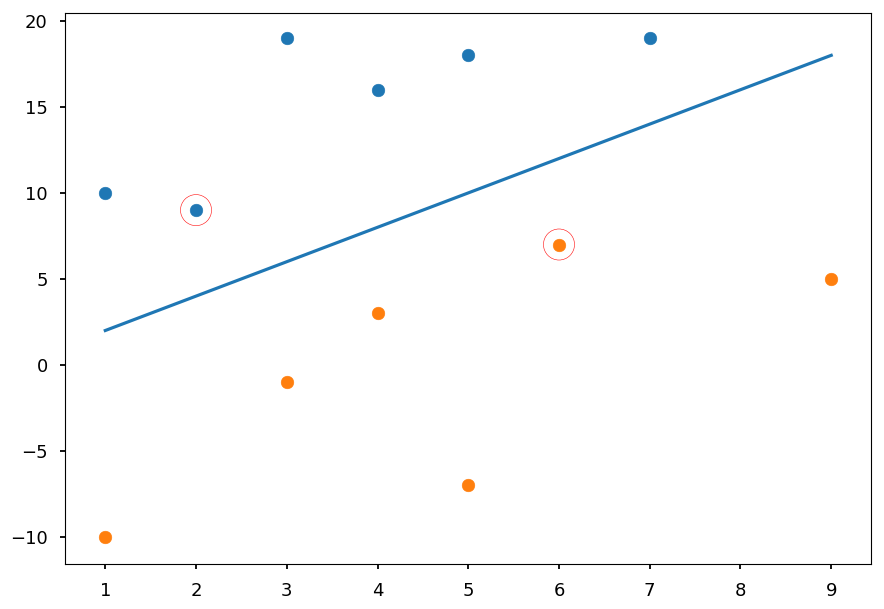

In [32]:
sv = clf.support_vectors_  # support vectors
w = clf.coef_[0]           # weights
b = clf.intercept_         # intercept

# w[0] * x + w[1] * y + b = 0
f = lambda x: -(b + w[0]*x) / w[1]

# plot training data
plt.scatter(*(zip(*X01)))
plt.scatter(*(zip(*X02)))

# plt decision boundary
plt.plot([1,9], [f(1), f(9)])

# mark support vectors
plt.scatter(*(zip(*sv)), zorder=1, facecolors='none', edgecolors='r', s=500);

### Circle

* For the simple non-linear problem lets consider once again points inside / outside a circle

* But this time let them also overlap a little bit die to some noise in data

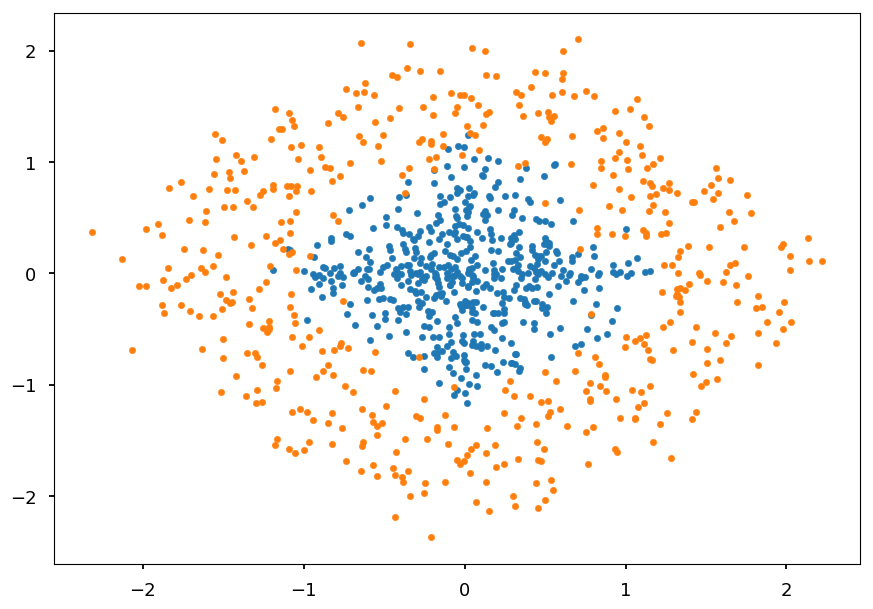

In [35]:
def generate_circle_data(R1=0, R2=1, N=500):
  """Generate N points in a circle for radius range (R1, R2)"""
  r = lambda: R1 + np.random.random() * (R2 - R1) + np.random.normal(0, 0.2)
  
  return np.array([(r() * np.cos(ang), r() * np.sin(ang))
                   for ang in np.linspace(0, 2*np.pi, N)])

C01 = generate_circle_data()
C02 = generate_circle_data(1, 2)

plt.scatter(*C01.T, marker='.')
plt.scatter(*C02.T, marker='.');

* We will consider 4 different kernels:

    * linear
    
    * polynomial of degree 3
    
    * polynomial of degree 10
    
    * Gaussian radial basis function (RBF)

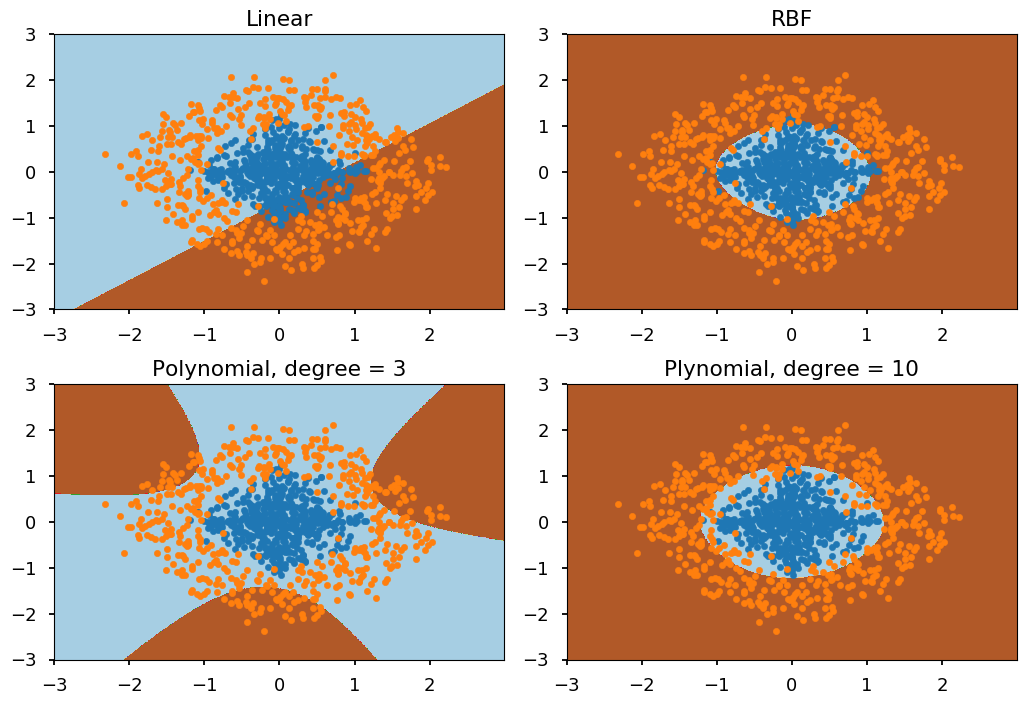

In [53]:
# create classifier with different kernels
clf_linear = svm.SVC(kernel="linear")
clf_rbf = svm.SVC(kernel="rbf")
clf_poly3 = svm.SVC(kernel="poly", degree=3)
clf_poly10 = svm.SVC(kernel="poly", degree=10)

titles = ("Linear", "RBF", "Polynomial, degree = 3", "Plynomial, degree = 10")

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.01))

# loop over classifiers
for i, clf in enumerate((clf_linear, clf_rbf, clf_poly3, clf_poly10)):
  # train classifier - assign -1 label for C01 and 1 for C02
  clf.fit(np.concatenate((C01, C02), axis=0), [-1]*len(C01) + [1]*len(C02))
  
  # visualize results
  plt.subplot(2, 2, i + 1)

  # decision boundary
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  # training data
  plt.scatter(*C01.T, marker='.')
  plt.scatter(*C02.T, marker='.')

  plt.title(titles[i])
  
plt.tight_layout()

## Multiclass classification

* There are two popular methods used to apply binary classificators to multiclass problem

* **one-vs-rest** (ovr) or **one-vs-all** (ova)

    * having $K$ classes with labels $y_i = \left\{1, \cdots, K\right\}$
    
    * train $K$ classifiers assuming $svm_i = 1$ and $svm_{j\neq i} = -1$
    
    * the prediction of a label for an unseen sample is based on a classifier which corresponds to the highest confidence score
    
* **one-vs-one** (ovo)

    * having $K$ classes with labels $y_i = \left\{1, \cdots, K\right\}$
    
    * train $K(K-1)/2$ classifiers for each possible pair of classes
    
    * the prediction is based on the voting scheme

### Example: blobs

* Lets use blobs form the previous lecture

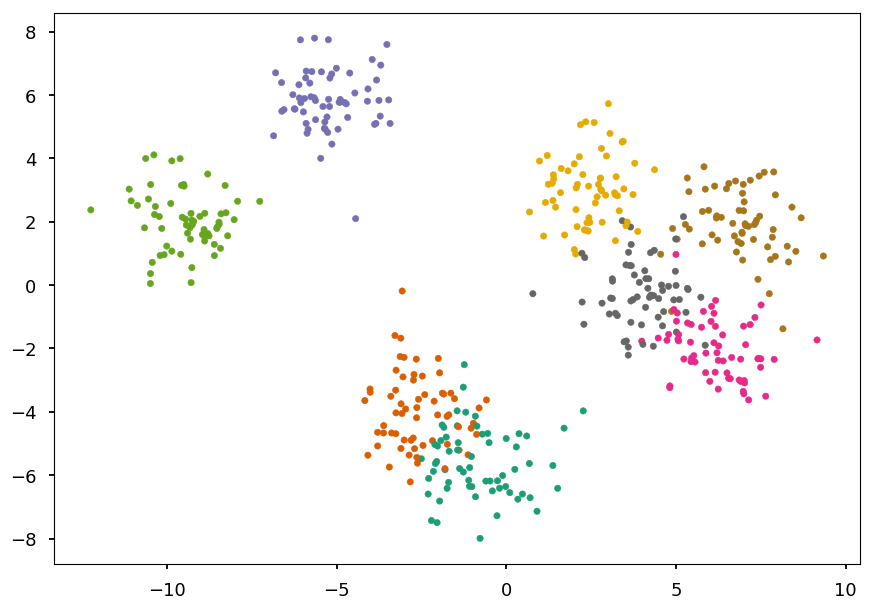

In [5]:
from sklearn.datasets import make_blobs

# generate 5 blobs with fixed random generator
X, Y = make_blobs(n_samples=500, centers=8, random_state=300)

plt.scatter(*X.T, c=Y, marker='.', cmap='Dark2');

* We can use the same function as last time to train and visualize

In [0]:
def train_and_look(classifier, X, Y, ax=None, title='', cmap='Dark2'):
  """Train classifier on (X,Y). Plot data and prediction."""
  # create new axis if not provided
  ax = ax or plt.gca();

  ax.set_title(title)

  # plot training data
  ax.scatter(*X.T, c=Y, marker='.', cmap=cmap)

  # train a cliassifier
  classifier.fit(X, Y)

  # create a grid of testing points
  x_, y_ = np.meshgrid(np.linspace(*ax.get_xlim(), num=200),
                       np.linspace(*ax.get_ylim(), num=200))

  # convert to an array of 2D points
  test_data = np.vstack([x_.ravel(), y_.ravel()]).T

  # make a prediction and reshape to grid structure 
  z_ = classifier.predict(test_data).reshape(x_.shape)

  # arange z bins so class labels are in the middle
  z_levels = np.arange(len(np.unique(Y)) + 1) - 0.5

  # plot contours corresponding to classifier prediction
  ax.contourf(x_, y_, z_, alpha=0.25, cmap=cmap, levels=z_levels)

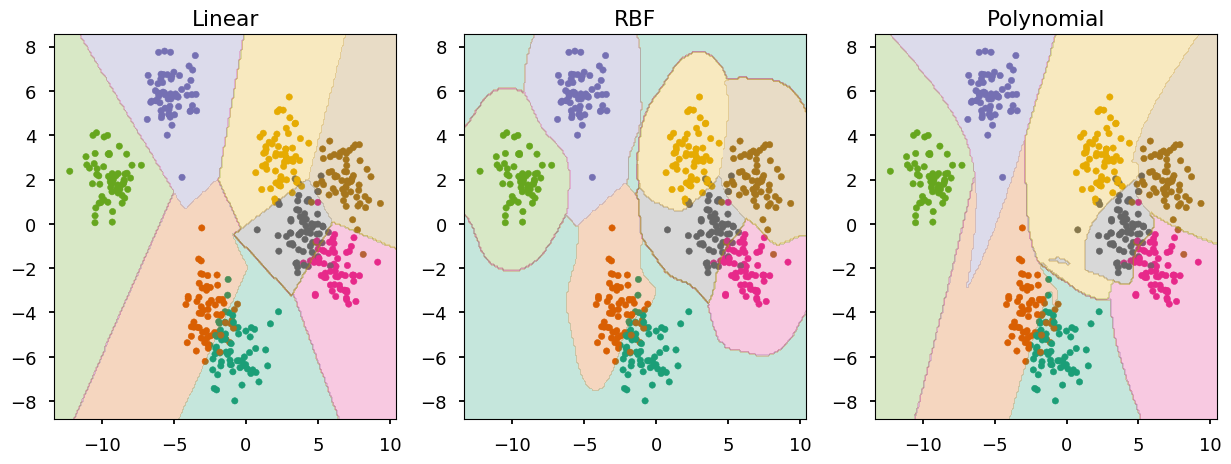

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

title = ("Linear", "RBF", "Polynomial")

settings = ({"kernel": "linear"}, {"kernel": "rbf"},
            {"kernel": "poly", "degree": 5})

# train and look at SVM with different kernels
for i in range(0, 3):
  train_and_look(svm.SVC(**settings[i]), X, Y,
                 ax=ax[i], title=title[i])

## SVM regression

* Lets consider the problem of approximating the set of data $\left\{(\vec x_1, y_1), \cdots, (\vec x_N, y_N)\right\}$, where $\vec x_i \in \mathcal{R}^n$ and $y_i \in \mathcal{R}$ with a linear function: <p align="center"><br>$f(\vec x) = \left<\vec w, \vec x\right> + b$</p><br>

* In epsilon-insensitive SVM ($\varepsilon$-SVM) the goal is to find $f(x)$ that deviates from $y_i$ by a value not greater than $\varepsilon$ for each training point, and at the same time is as flat as possible.

* And once again we end up with a optimization problem: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize}_{w,b} & \frac{1}{2}|\vec w|^2 \\\text{subject to} & y_i - \left<\vec w, \vec x_i\right> - b \leq \varepsilon\\ & \left<\vec w, \vec x_i\right> + b - y_i \leq \varepsilon\end{array}\right.$</p><br>

* It is enough if such $f$ actually exists

* However, analogously to soft margin, one can allow for some errors by introducing slack variables $\xi_i$ and $\xi^*_i$, and reformulate the optimization problem: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize}_{w,b} & \frac{1}{2}|\vec w|^2 + C\sum\limits_{i=1}^N(\xi_i + \xi^*_i) \\\text{subject to} & y_i - \left<\vec w, \vec x_i\right> - b \leq \varepsilon + \xi_i\\ & \left<\vec w, \vec x_i\right> + b - y_i \leq \varepsilon + \xi^*_i \\ & \xi_i, \xi^*_i \geq 0\end{array}\right.$</p><br>

* The corresponding dual problem is given by: <p align="center"><br>$\left.\begin{array}{cc}\text{minimize}_{\mu} & -\frac{1}{2}\sum\limits_{i, j = 1}^N(\mu_i - \mu^*_i)(\mu_j - \mu^*_j)\left<\vec x_i, \vec x_j\right> - \varepsilon\sum\limits_{i=1}^N(\mu_i + \mu^*_i) + \sum\limits_{i=1}^Ny_i(\mu_i - \mu^*_i)\\\text{subject to} & \sum\limits_{i=1}^N(\mu_i - \mu^*_i) = 0 \\ & \mu_i, \mu^*_i\in\left[0, C\right]\end{array}\right.$</p><br>

* And the solution is given by: $\vec w = \sum\limits_{i=1}^N(\mu_i - \mu^*_i)\vec x_i$, thus: <p align="center"><br>$f(\vec x) = \sum\limits_{i=1}^N(\mu_i - \mu^*_i)\left<\vec x_i, \vec x\right> + b$</p><br>

* Or for the kernelized version: <p align="center"><br>$f(\vec x) = \sum\limits_{i=1}^N(\mu_i - \mu^*_i)K(\vec x_i, \vec x)+ b$</p><br>

* The intercept $b$ can be calculate for any support vector as $f(\vec x_{SV}) = y_{SV}$

### Example - Boston Housing dataset

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Visualize dataset

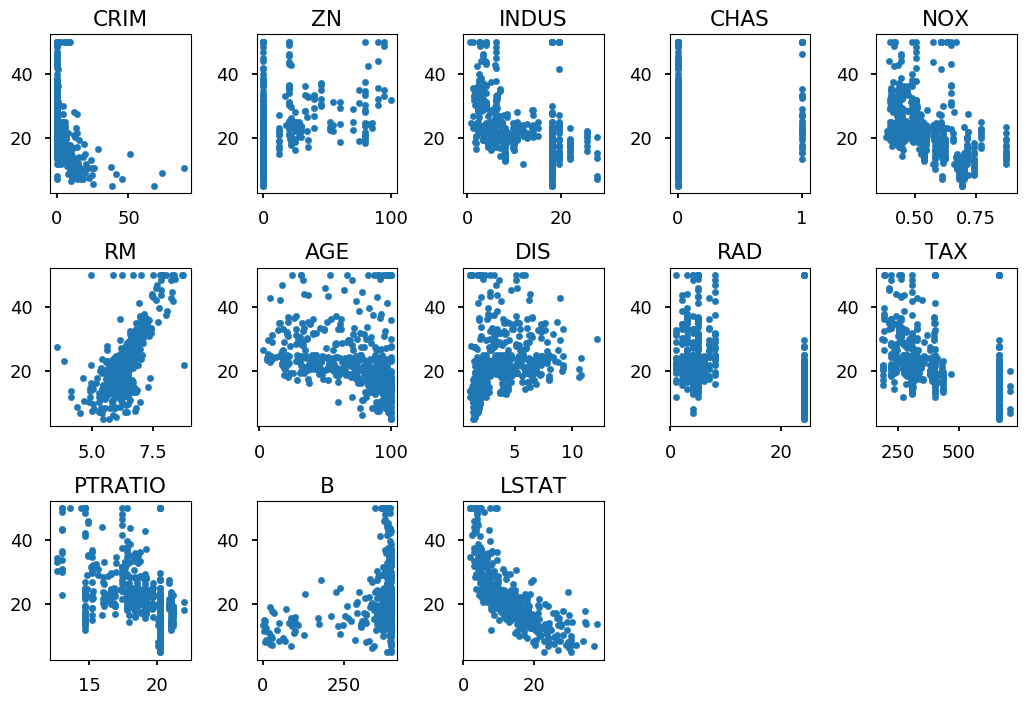

In [6]:
for i, feature in enumerate(boston.data.T):
  plt.subplot(3, 5, i+1)
  plt.scatter(feature, boston.target, marker='.')
  plt.title(boston.feature_names[i])
  
plt.tight_layout()

In [7]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data)     # load features
boston_pd.columns = boston.feature_names  # add features names
boston_pd['PRICE'] = boston.target        # add a column with price

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Test SVR

* Below there is a result for the linear kernel - feel free to play with kernels and/or parameter $C$ on your own

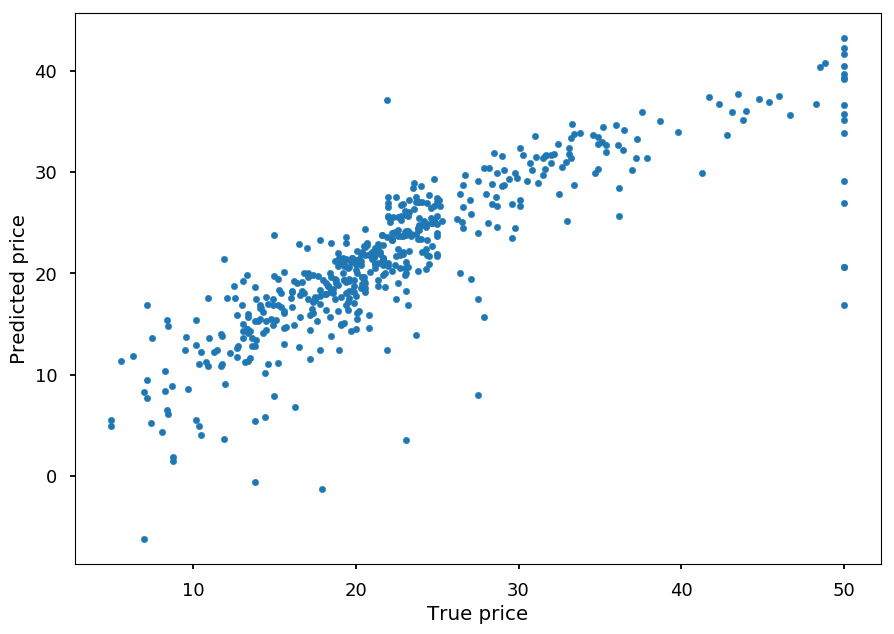

In [5]:
from sklearn.svm import SVR

regressor = SVR(kernel="linear")
regressor.fit(boston.data, boston.target)

prediction = regressor.predict(boston.data)

plt.xlabel("True price")
plt.ylabel("Predicted price")

plt.scatter(boston.target, prediction, marker='.');

## Summary

* Support vector machine is a powerful model for both classification and regression

* It guarantees finding the optimal hyperplane / decision boundary (if exists)

* It is effective with high dimensional data

* The dual formulation of the optimization problem allows easily to introduce kernels and deal with non-linear data

* It has just few hyperparameters: kernel + kernel's parameters and $C$

* Inference is fast as it depends only on a subset of training samples (support vectors) - although training may be slow for large datasets